
# Prática 6

***Aprendizado Dinâmico***

por **Cibele Russo** (ICMC/USP - São Carlos SP)

**MBA em Ciências de Dados**


# Modelos de Espaço de Estados - SARIMAX - Modelo Theta

<h2>Modelos de Espaço de Estados</h2>


$$\begin{array}{ll}y_t & = X_t \alpha_t + d_t + \varepsilon_t \\
  \alpha_{t+1} & = T_t \alpha_t + c_t + R_t \eta_t\end{array}$$


𝑦𝑡: vetor de observações no tempo t

𝑋𝑡: matriz de desenho. Relaciona os estados ocultos 𝛼𝑡 com as observações. Essa matriz indica a contribuição de cada estado latente para cada observação. </br>
𝛼𝑡: vetor de estados ocultos (não observáveis) </br>
𝑑𝑡: intercepto das observações. Termo constante que pode ser adicionado as observações.</br>

𝜀𝑡: termo de erro. Captura o ruído ou incerteza. Supõe que $$\begin{array}{l}\varepsilon_t \sim N(0, H_t)\end{array}$$

ou seja, segue uma distribução normal com média 0 e covariância 𝐻𝑡

𝛼𝑡+1: vetor de estados ocultos em t+1. Descreve a evolução dos estados ao longo do tempo</br>
𝑇𝑡: Matriz de transição. Descreve como os estados 𝛼𝑡 no tempo t se transforma nos estados 𝛼𝑡+1 </br>
𝑐𝑡: intercepto do estado </br>
𝑅𝑡: matriz de seleção. </br>
𝜂𝑡: Termo de erro do estado. Representa o ruído ou a incerteza na transição dos estados. $$\begin{array}{l}\eta_t \sim N(0, Q_t) \end{array}$$

<h2>SARIMAX</h2>

SARIMAX é uma generalização do ARIMA que incorpora sazonalidade e variáveis exógenas.


\\begin{aligned}
y_t &= c + \sum_{i=1}^{p} \phi_i y_{t-i} + \sum_{j=1}^{P} \Phi_j y_{t-js} \\
&+ \sum_{k=1}^{q} \theta_k \epsilon_{t-k} + \sum_{l=1}^{Q} \Theta_l \epsilon_{t-ls} \\
&+ \sum_{m=1}^{M} \beta_m X_{t,m} + \epsilon_t
\end{aligned}

Em que:

𝑦𝑡: Valor da série temporal no tempo t. </br>
c: Constante. </br>
𝜙𝑖: Coeficiente autorregressivo para o lag  </br>
Φ𝑗: Coeficiente autorregressivo sazonal para o lag j </br>
𝜃𝑘: Coeficiente de média móvel para o lag k </br>
Θ𝑙: Coeficiente de média móvel sazonal para o lag l </br>
𝜖𝑡: Termo de erro (resíduo) no tempo t </br>
𝑠: Período sazonal. </br>
𝑋𝑡,𝑚: Variável exógena no tempo t para a m-ésima variável.</br>
𝛽𝑚: Coeficiente da variável exógena 𝑋𝑡,𝑚 </br>

<h2>Método Theta</h2>

1. Linha com theta =1, é a série original </br>
2. Quando 0 < theta < 1 a série é deflacionada . Ou seja, flutuações de curto prazo são menores e enfatizamos os efeitos de longo prazo. </br>
3. Quando  theta atinge 0 a série é transformada em uma linha reta </br>
4. Quando theta é maior que 1, então as flutuações de curto prazo são infladas e então enfatizamos os efeitos de curto prazo.

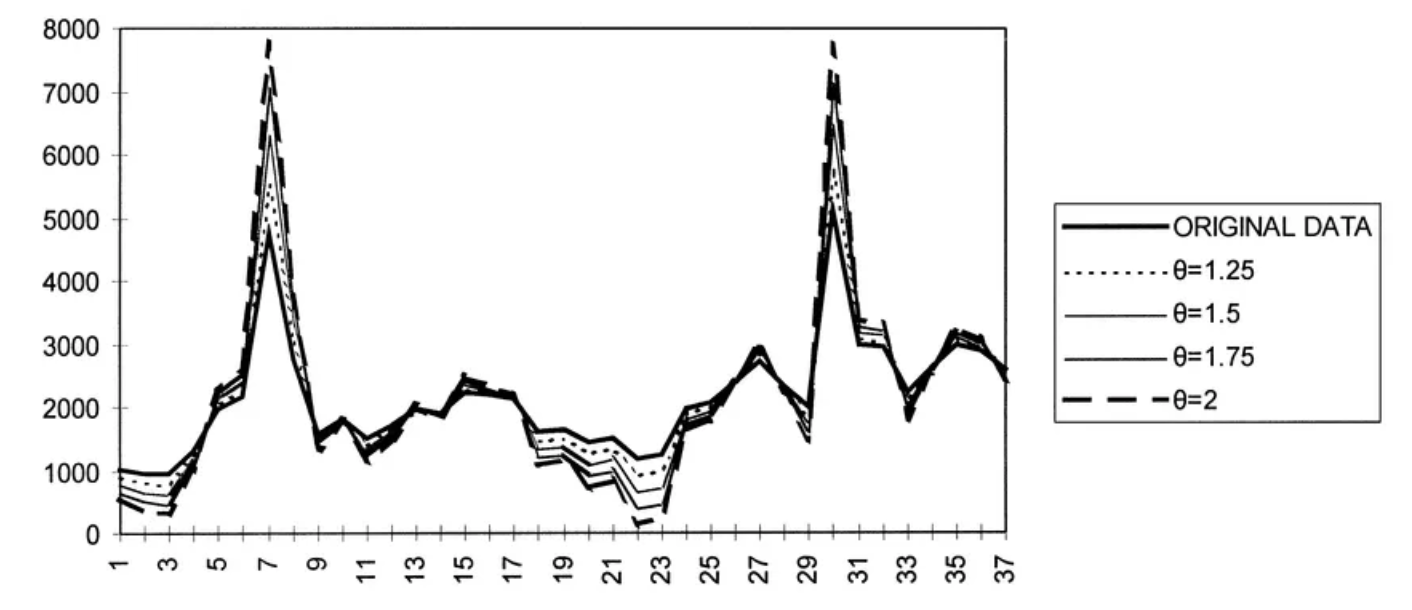



```
# https://www.researchgate.net/publication/223049702_The_theta_model_A_decomposition_approach_to_forecasting
```



# Exercícios

Nesta prática vamos comparar o Método Theta com o Método de Holt, visto na Aula 2, para previsões dos 30 próximos dias para os dados VALE3. Repita com janelas menores como 20 ou 10 dias.

**1. Carregue os pacotes que serão utilizados e faça a leitura dos dados, completando os dados faltantes como visto em aula.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("figure",figsize=(12,6))
plt.rc("font",size=15)
plt.rc("lines",linewidth=2)
sns.set_style("darkgrid")

# Ignorar warnings não prejudiciais
import warnings
warnings.filterwarnings("ignore")

**2. Carregue as bibliotecas e faça a leitura dos dados VALE3. Utilizaremos a variável Close.**

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Aprendizado-Dinamico/main/Data/VALE3.csv', index_col=0, parse_dates=True)

idx = pd.date_range(start=df.index.min(), end=df.index.max(), freq='B')
df = df.reindex(idx)

df.fillna(method='ffill', inplace=True)

df.head()

,Open,High,Low,Close,Adj Close,Volume
2020-07-21,60.439999,60.480000,59.270000,59.700001,53.772350,29043600.0
2020-07-22,59.930000,60.250000,58.799999,59.240002,53.358028,19644700.0
2020-07-23,59.900002,60.160000,58.639999,58.849998,53.006744,17291900.0
2020-07-24,58.570000,58.849998,57.820000,58.599998,52.781574,22544100.0
2020-07-27,59.099998,61.630001,58.980000,61.369999,55.276535,35124800.0


In [3]:
df.index

DatetimeIndex(['2020-07-21', '2020-07-22', '2020-07-23', '2020-07-24',
               '2020-07-27', '2020-07-28', '2020-07-29', '2020-07-30',
               '2020-07-31', '2020-08-03',
               ...
               '2021-07-07', '2021-07-08', '2021-07-09', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-19', '2021-07-20'],
              dtype='datetime64[ns]', length=261, freq='B')

**3. Faça um gráfico da série.**

In [ ]:
data = df[["Close"] == ]

<Axes: >

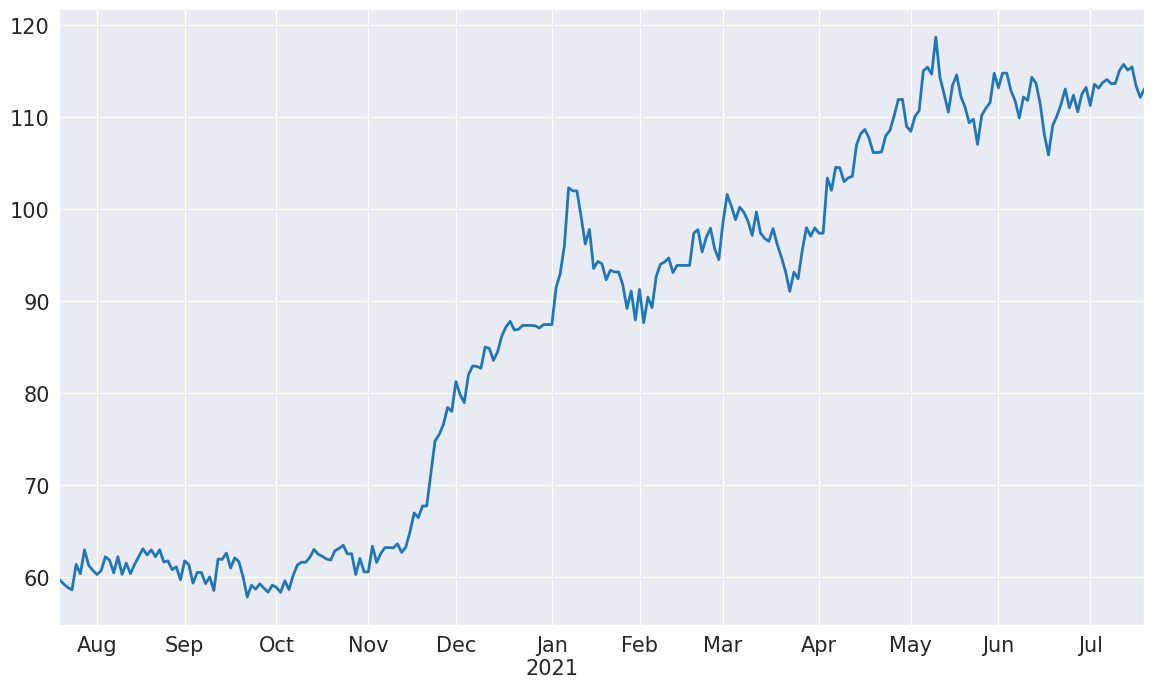

In [4]:
plt.rcParams['figure.figsize'] = [14,8]
df['Close'].plot()

**4. Defina bases de treino e teste, deixando 30 observações para a base de teste.**

In [5]:
train = df.iloc[:-30]
test = df.iloc[-30:]

**5. Faça uma decomposição da série em tendência, sazonalidade e resíduos. Qual o período de sazonalidade mais adequado?**

In [8]:
help(seasonal_decompose)

Help on function seasonal_decompose in module statsmodels.tsa.seasonal:

seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
    Seasonal decomposition using moving averages.
    
    Parameters
    ----------
    x : array_like
        Time series. If 2d, individual series are in columns. x must contain 2
        complete cycles.
    model : {"additive", "multiplicative"}, optional
        Type of seasonal component. Abbreviations are accepted.
    filt : array_like, optional
        The filter coefficients for filtering out the seasonal component.
        The concrete moving average method used in filtering is determined by
        two_sided.
    period : int, optional
        Period of the series (e.g., 1 for annual, 4 for quarterly, etc). Must
        be used if x is not a pandas object or if the index of x does not have
        a frequency. Overrides default periodicity of x if x is a pandas
        object with a timeseries index.
 

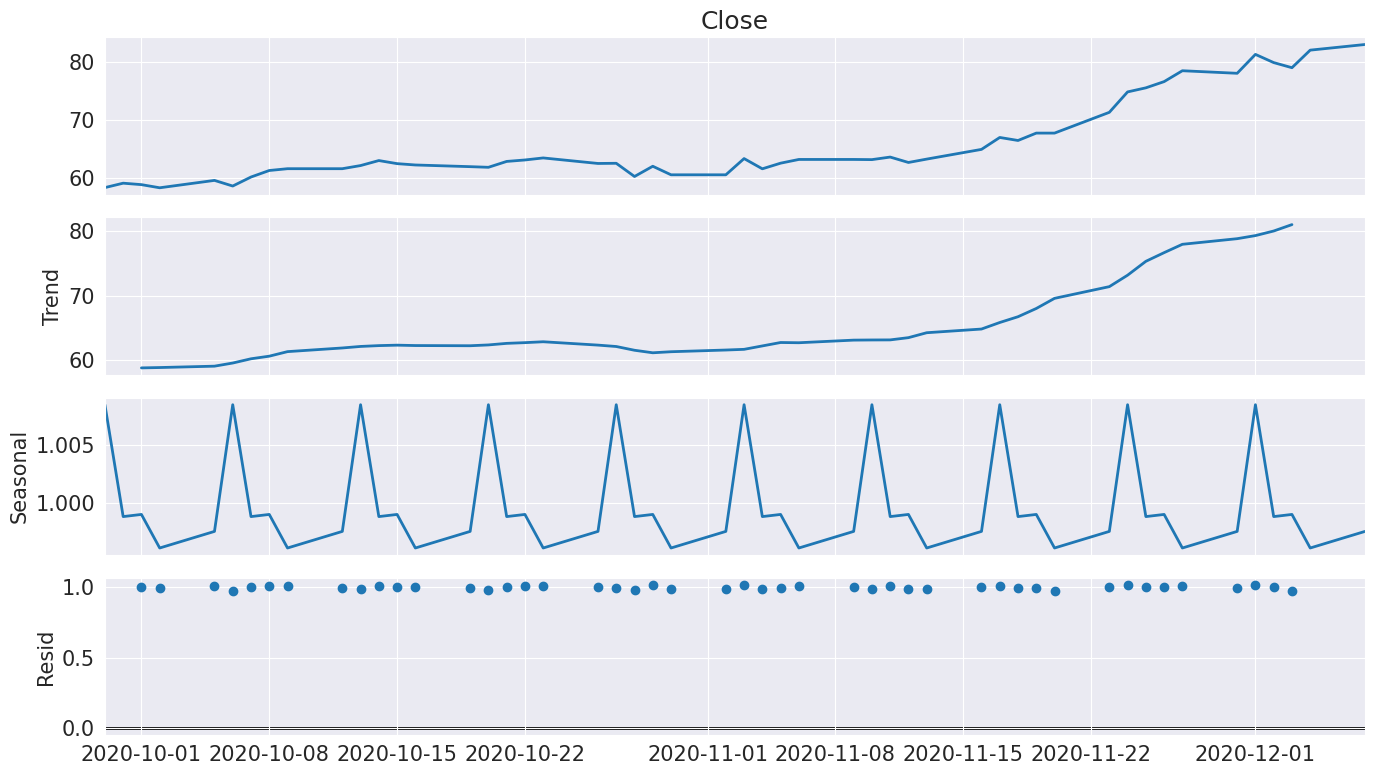

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

result = seasonal_decompose(train['Close'][50:100], model='multiplicative', period=5)
result.plot()
pyplot.show()

**6. Obtenha as previsões pelo Método Theta.**

In [11]:
from statsmodels.tsa.forecasting.theta import ThetaModel

tm = ThetaModel(train['Close'],deseasonalize=True,period=5).fit()


In [13]:
tm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ThetaModel Results                              
==============================================================================
Dep. Variable:                  Close   No. Observations:                  231
Method:                       OLS/SES   Deseasonalized:                   True
Date:                Thu, 22 Aug 2024   Deseas. Method:         Multiplicative
Time:                        23:50:45   Period:                              5
Sample:                    07-21-2020                                         
                         - 06-08-2021                                         
  Parameter Estimates   
========================
          Parameters    
------------------------
b0    0.2797856062015886
alpha 0.9204099294914058
------------------------
"""

In [12]:
prevision_theta = tm.forecast(30)

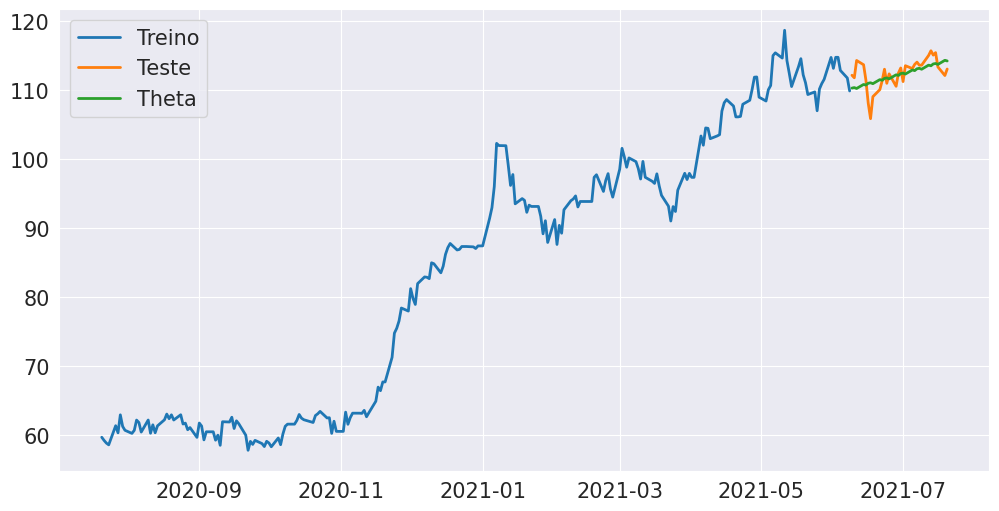

In [14]:
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Treino')
plt.plot(test['Close'], label='Teste')
plt.plot(prevision_theta, label='Theta')
plt.legend()
plt.show()

**7. Aplique o Método de Holt para os dados de teste e preveja as próximas 30 observações.**

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing

In [16]:
modelo_holt = ExponentialSmoothing(train['Close'],trend='add')

In [17]:
ajuste_holt = modelo_holt.fit()
train['holt'] = ajuste_holt.fittedvalues.shift(-1)
predicao_holt = ajuste_holt.forecast(30)


In [21]:
ajuste_holt_winters = ExponentialSmoothing(train['Close'],trend='add',seasonal='add',seasonal_periods=5).fit()

In [22]:
train['holt_winters'] = ajuste_holt_winters.fittedvalues.shift(-1)

In [24]:
predicao_holt_winters = ajuste_holt_winters.forecast(30)

**8. Represente graficamente os resultados, com as bases de treino e teste.**

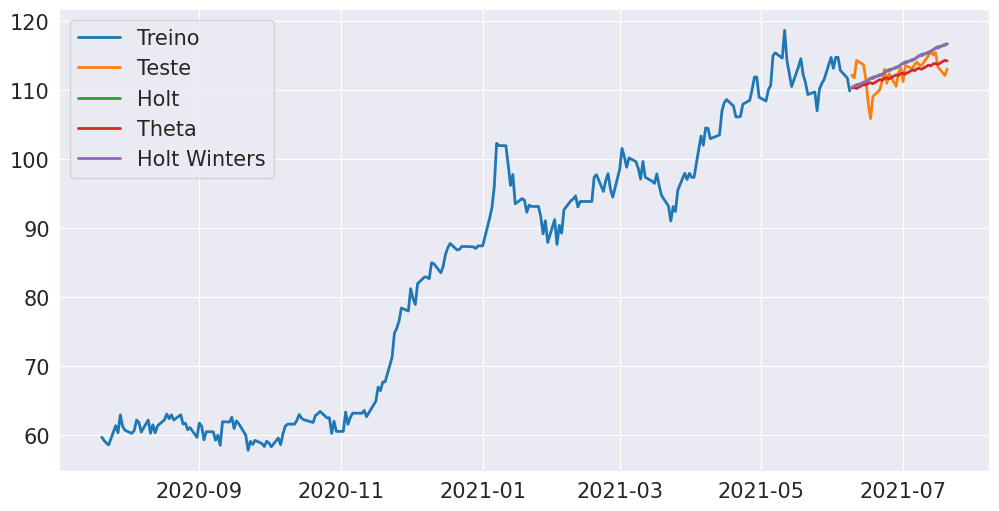

In [25]:
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Treino')
plt.plot(test['Close'], label='Teste')
plt.plot(predicao_holt, label='Holt')
plt.plot(prevision_theta, label='Theta')
plt.plot(predicao_holt_winters, label='Holt Winters')
plt.legend()
plt.show()

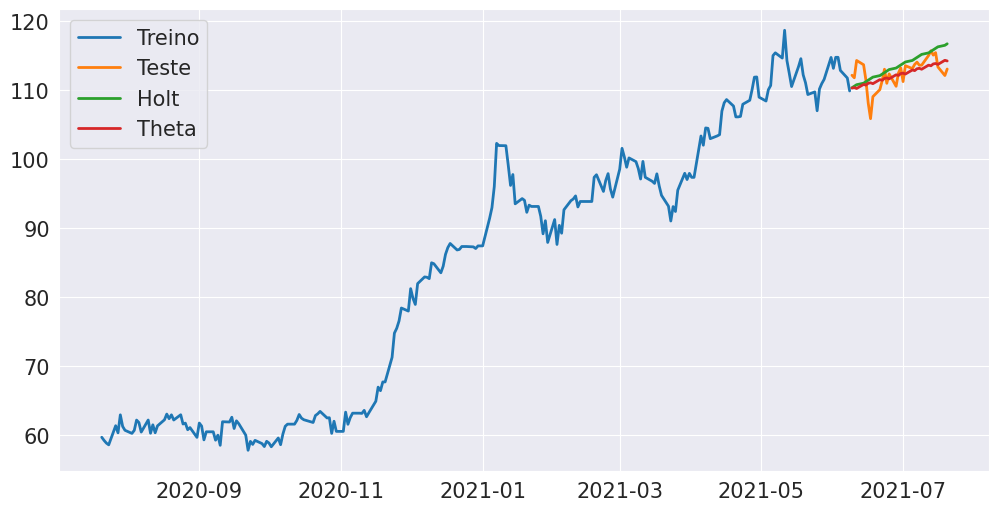

In [18]:
plt.figure(figsize=(12,6))
plt.plot(train['Close'], label='Treino')
plt.plot(test['Close'], label='Teste')
plt.plot(predicao_holt, label='Holt')
plt.plot(prevision_theta, label='Theta')
plt.legend()
plt.show()

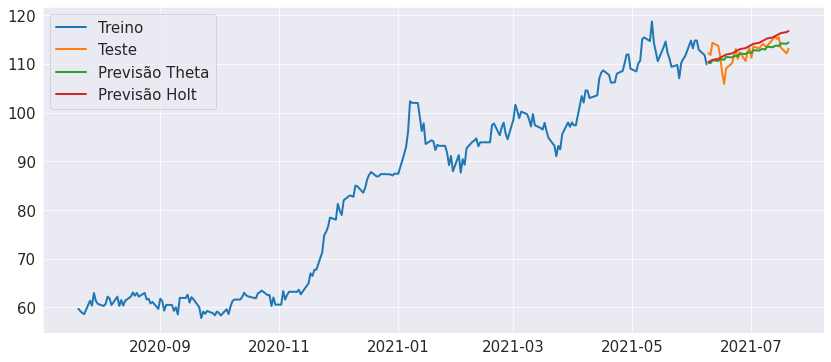

**9. Utilize o EQM para comparar as previsões. Qual o melhor método?**

In [19]:
from sklearn.metrics import mean_squared_error
error = mean_squared_error(test['Close'], predicao_holt)
error

5.0088683923088295

In [33]:
error = mean_squared_error(test['Close'], prevision_theta)
error

3.357431751127438

In [32]:
error = mean_squared_error(test['Close'], predicao_holt_winters)
error

5.079567290120452

**11. Repita os procedimentos para obter previsões para dados futuros, ou seja, utilizando todos os dados disponíveis e fazendo previsões para os próximos 20 dias.**

In [27]:
res = ThetaModel(train['Close'],deseasonalize=True,period=5).fit()
fcast = res.forecast(20)

In [28]:
modelo_holt = ExponentialSmoothing(train['Close'],trend='add')
ajuste_holt = modelo_holt.fit()
train['holt'] = ajuste_holt.fittedvalues.shift(-1)
predicao_holt = ajuste_holt.forecast(20)



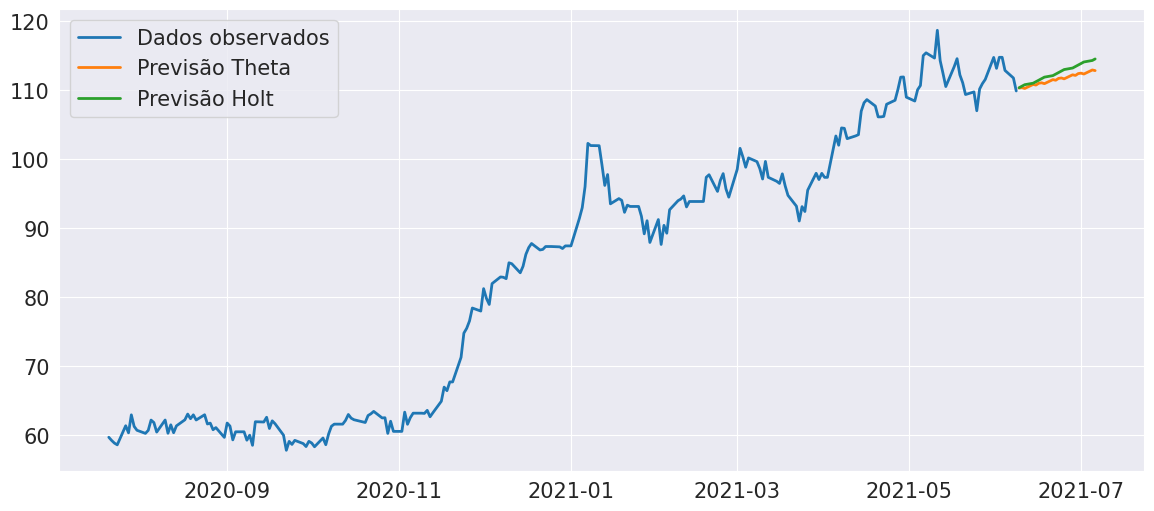

In [31]:
plt.figure(figsize = (14,6))


plt.plot(train['Close'], label='Dados observados')
plt.plot(fcast, label='Previsão Theta')
plt.plot(predicao_holt, label='Previsão Holt')

plt.legend()
plt.show()


**11. Retorne e mude o tamanho das bases de treino e teste, para por exemplo 10 ou 20 observações na amostra de teste. Os resultados são similares?**